# Simulated coin toss

To get a feel for how likely different outcomes are, we are going to <i>simulate the data generating process</i>

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/Minion_what.jpg" width="15%"  />

Here is an example of how we could <i>simulate the data generating process</i> in real life:

To work out how likely we are to get 5 heads out of 10 coin tosses, we could...

* get a real coin (but who has cash on them these days?)
* assume it is fair ($p = 0.5$)
* toss it 10 times (because $n = 10$)
* count the number of heads ($k$)

... 

Then we could **repeat the whole process many times (say, 100 times)** and count how often we get exactly 5 heads.

Or.... we could get the computer to do that. 

Yes, let's get the computer to do it. That will be less hassle.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Simulate a single coin toss

The computer doesn't really toss a coin. 

It does something mathematically equivalent, namely generates a random number called `x` and applies a test to it that will give a "hit" a certain proportion of the time, defined by $p$. 

If the outcome is a hit,
the value of the variable `hit` is set to 1, otherwise `hit` is set to zero

**Generate a random number**

Try running the code block below several times and see if you understand what it does. 

In [2]:
# generate a random number between 0 and 1
x = np.random.uniform(0,1)
print('value of random number:  ' + str(x))

value of random number:  0.4002188904696188


What happened?

We used numpy's random number generator (np.random) to get a number (with decimal places) between 0 and 1. The numbers are drawn from a uniform distribution, which means that any number between 0 and 1 is equally likely.

Re-run the code block above a few times - you should get a different random number every time. 

The next code block uses the argument `size=10000` to generate 10000 of these random numbers; we then plot their distribution in a histogram (hopefully you can see how all values between 0 and 1 and equally likely):

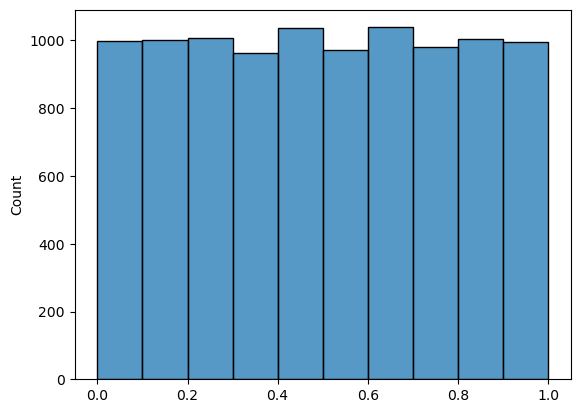

In [3]:
x = np.random.uniform(0,1, size=10000)
sns.histplot(x, bins=np.arange(0,1.1,0.1))
plt.show()

**Threshold the random number**

How do we convert this to a virtual 'coin toss'? We need to randomly generate "hits" and "misses" rather than decimal numbers.

To do this we simply add a piece of code that checks whether our random number is less than some cut-off value - in this case 0.5, as we should get equal frequencies of random numbers greater than 0.5 and less than 0.5, thus simulating a fair coin.
* You will see why we use a cutoff of *less than* $p$ when we set $p$ to a value other than 0.5!

Try running the code below a few times - hopefully you can see how the numerical value of `x` converts into a binary hit/miss

In [4]:
# check if it is less than p - this should happen on a proportion of trials equal to p
x = np.random.uniform(0,1)
p=0.5
if x<p:
    hit = 1
else:
    hit = 0
print(x)
print('is it a hit?:            ' + str(hit))

0.8449950977645189
is it a hit?:            0


### Simulate 10 coin tosses

In our coin tossing example, we need to toss the coin 10 times ($n=10$) 
and count how many hits we get ($k=?$)

We have already seen that we can generate however many random numbers we like using the argument `size` - `x` becomes a `numpy` array with 10 entries:

In [5]:
x = np.random.uniform(0,1, size=10)
print(x)

[0.85313099 0.24099158 0.69619368 0.46599222 0.08268174 0.09622195
 0.63814402 0.60951859 0.16646421 0.39810078]


Now we convert our numbers into hits and misses (or `True/False` or `1/0` values)

In [6]:
print(x<p)

[False  True False  True  True  True False False  True  True]


Now we need to check what proportion of values in `x` exceeded $p$ (remembering that a value of `True` above is equivalent to a numerical value of 1, and `False` is equal to zero, so the proportion of `True` elements is just the mean of the array)

In [7]:
p=0.5
np.mean(x<p)

0.6

### Use a built in function

Simulating outcomes is actually something coders do a lot so there is a package for it in `numpy`, called `numpy.random`

`numpy.random` draws a random sample from a probability distriution (you have to tell it which distribution to use though - binomial, normal or many more). In this case, the number $k$ of heads in $n$ coin tosses follows the **binomial distribution** as introduced in the lecture:

$$ k \sim \mathcal{B}(n,p) $$

... where $n=10$ and $p=0.5$, ie

$$ k \sim \mathcal{B}(10,0.5) $$

We therefore use <tt>numpy.random.binomial</tt>

Let's try - it makes the code a lot more compact

In [8]:
np.random.binomial(10,0.5) 
# generate 10 samples with a 0.5 chance of a hit, and return the number of hits 

4

The single line of code above does everything that the code blocks in the previouss section did 

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/Minion_tadaaa.jpg" width="15%"  />
